In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.applications import InceptionV3
from PIL import Image

In [2]:
# Definir caminhos dos diretórios de treino, validação e teste
diretorio_treino = 'D:/Pessoal/Estudos_Pessoais/Pos_Graduacao/Clone_GitHub/Sprint_2/Deep_Learning/Geological_Structures/Classes_Structures/Train/'
diretorio_validacao = 'D:/Pessoal/Estudos_Pessoais/Pos_Graduacao/Clone_GitHub/Sprint_2/Deep_Learning/Geological_Structures/Classes_Structures/Validation/'
diretorio_teste = 'D:/Pessoal/Estudos_Pessoais/Pos_Graduacao/Clone_GitHub/Sprint_2/Deep_Learning/Geological_Structures/Classes_Structures/Test/'

In [3]:
# Definir o tamanho das imagens e o número de classes
input_shape = (256, 256, 3)
num_classes = 9

In [4]:
# Definir os hiperparâmetros do treinamento
batch_size = 128
epochs = 100

In [5]:
# Definir o data augmentation para imagens de treinamento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Usar o ImageDataGenerator normal (sem data augmentation) para imagens de validação e teste
validation_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


In [6]:
# Definir o gerador de dados para as imagens de treinamento
train_generator = train_datagen.flow_from_directory(
    diretorio_treino,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    diretorio_validacao,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    diretorio_teste,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1310 images belonging to 9 classes.
Found 360 images belonging to 9 classes.


Found 135 images belonging to 9 classes.


In [7]:
# Carregar o modelo InceptionV3 pré-treinado
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar todas as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Adicionar as suas camadas personalizadas no topo do modelomodel = Sequential()
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.35),
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Criar o callback para visualização das imagens durante o treinamento
tensorboard_callback = TensorBoard(log_dir='./logs')

In [11]:
# Treinar o modelo e armazenar o histórico
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[tensorboard_callback]
)

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 2.2023 - accuracy: 0.1650 - val_loss: 1.9715 - val_accuracy: 0.4805
Epoch 2/100
10/10 [==============================] - 10s 1s/step - loss: 1.8152 - accuracy: 0.4230 - val_loss: 1.4478 - val_accuracy: 0.5742
Epoch 3/100
10/10 [==============================] - 10s 979ms/step - loss: 1.3833 - accuracy: 0.5321 - val_loss: 1.0644 - val_accuracy: 0.6445
Epoch 4/100
10/10 [==============================] - 10s 965ms/step - loss: 1.1444 - accuracy: 0.6058 - val_loss: 0.9991 - val_accuracy: 0.6523
Epoch 5/100
10/10 [==============================] - 9s 926ms/step - loss: 0.9717 - accuracy: 0.6531 - val_loss: 0.8167 - val_accuracy: 0.7461
Epoch 6/100
10/10 [==============================] - 10s 953ms/step - loss: 0.9274 - accuracy: 0.6819 - val_loss: 0.8591 - val_accuracy: 0.7227
Epoch 7/100
10/10 [==============================] - 10s 985ms/step - loss: 0.8372 - accuracy: 0.7369 - val_loss: 0.8209 - val_accuracy: 0.7383

In [12]:
# Salvar o modelo Deep CNN
model.save('D:/Pessoal/Estudos_Pessoais/Pos_Graduacao/Clone_GitHub/Sprint_2/Deep_Learning/Geological_Structures/Models_Train/Inception_model4.h5')

In [13]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Acurácia no conjunto de teste:', test_accuracy)

1/1 [==============================] - 0s 449ms/step - loss: 0.5225 - accuracy: 0.8672
Acurácia no conjunto de teste: 0.8671875


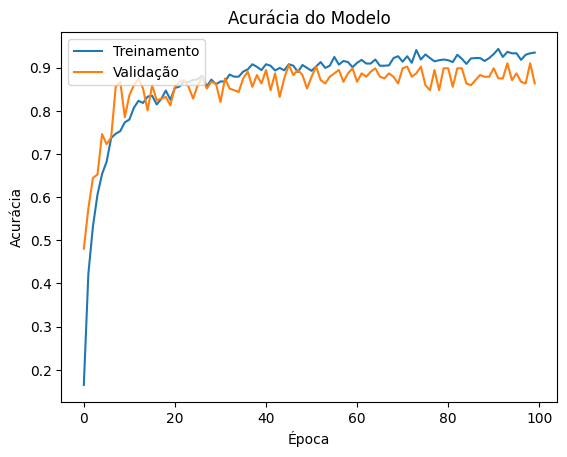

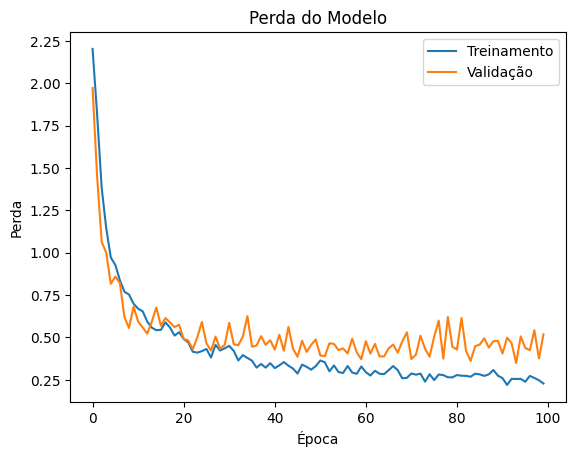

In [14]:
# Plotar a acurácia e a perda durante o treinamento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

4/4 [==============================] - 1s 57ms/step


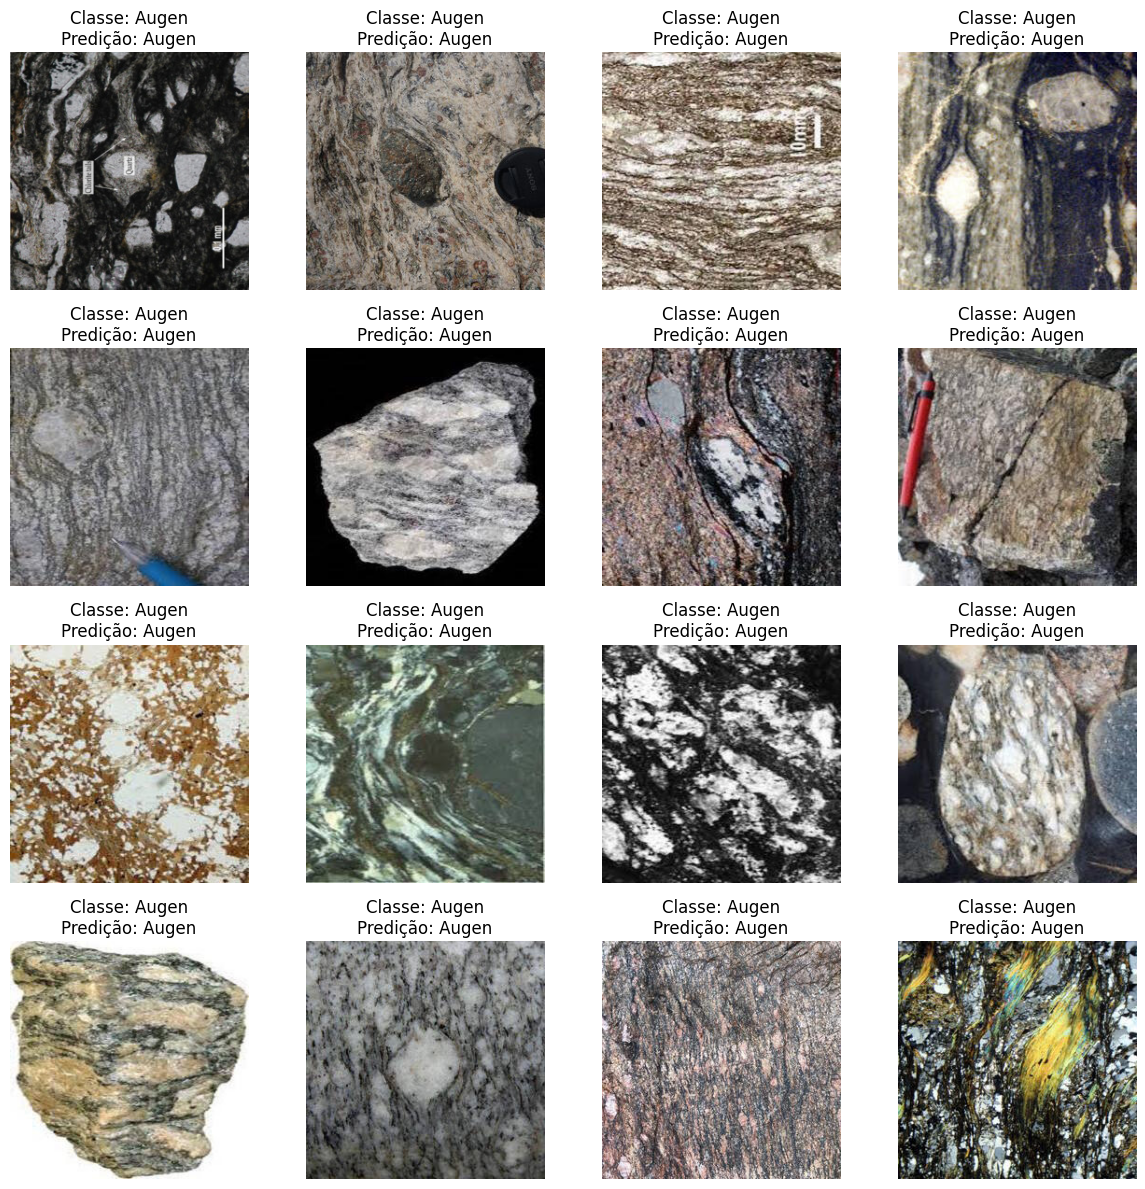

In [15]:
# Visualizar algumas imagens do conjunto de validação e suas classes
class_names = sorted(validation_generator.class_indices.keys())
images, labels = next(validation_generator)
predicted_labels = model.predict(images)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = images[i]
    label = np.argmax(labels[i])
    predicted_label = np.argmax(predicted_labels[i])
    
    ax.imshow(img)
    ax.set_title(f'Classe: {class_names[label]}\nPredição: {class_names[predicted_label]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [16]:
# Fazer previsões nas imagens de teste
predictions = model.predict(test_generator)

2/2 [==============================] - 2s 478ms/step


In [17]:
# Obter as classes preditas para cada imagem
predicted_classes = np.argmax(predictions, axis=1)

In [18]:
# Obter as classes reais para cada imagem
true_classes = test_generator.classes

In [19]:
# Obter os rótulos das classes
class_labels = list(test_generator.class_indices.keys())

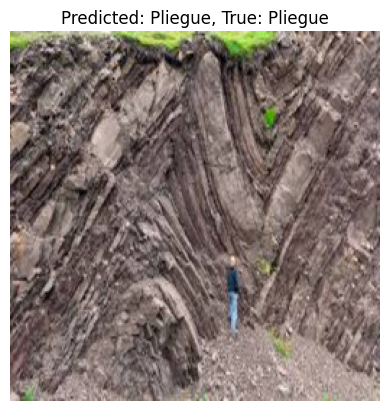

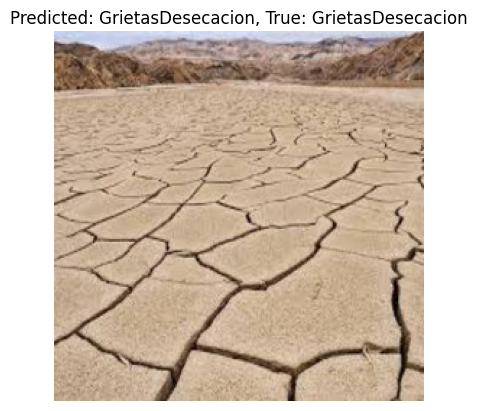

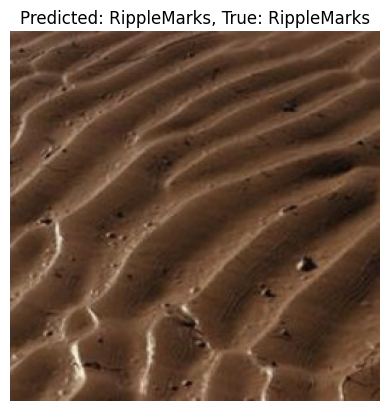

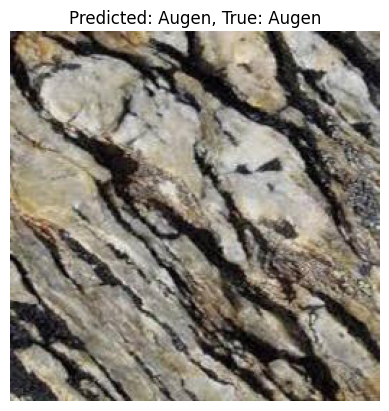

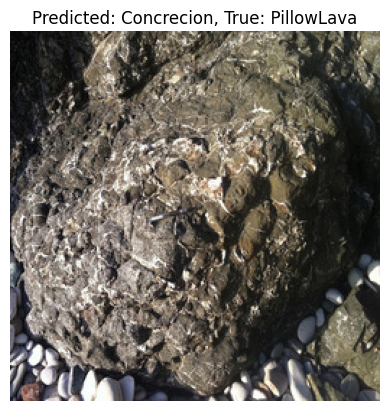

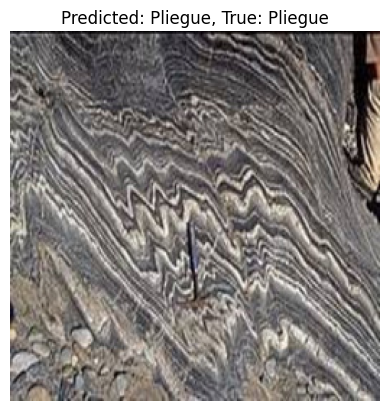

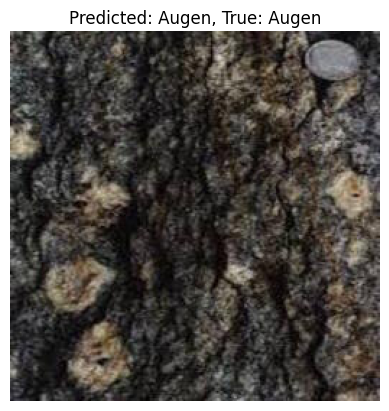

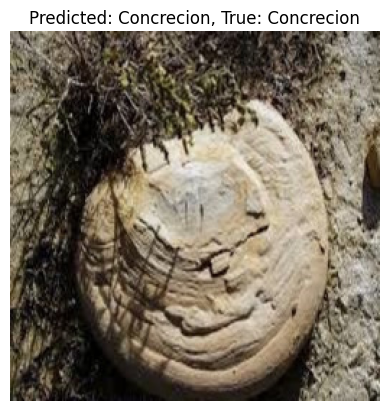

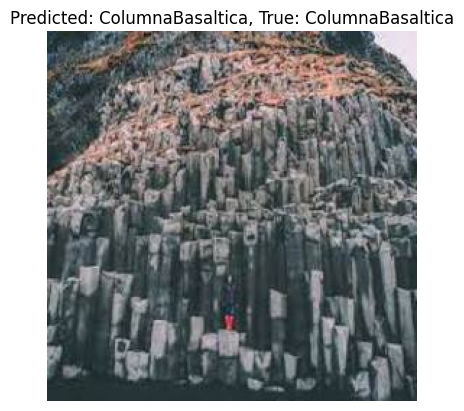

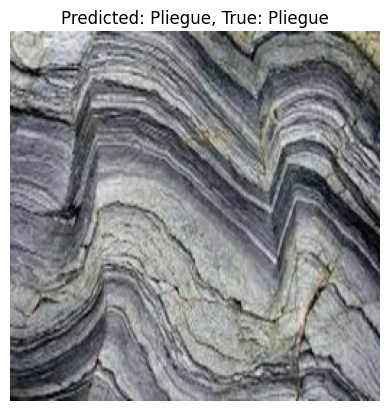

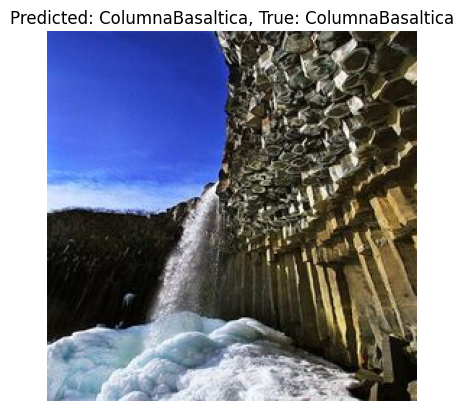

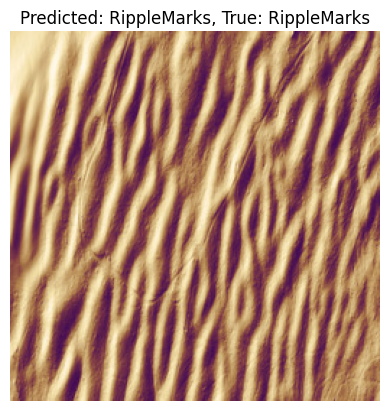

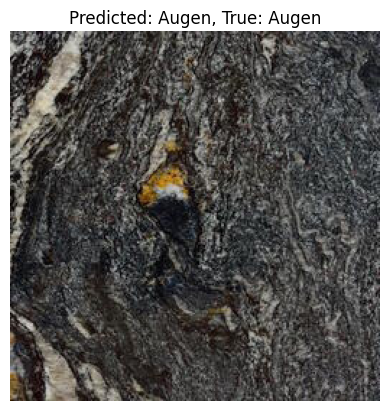

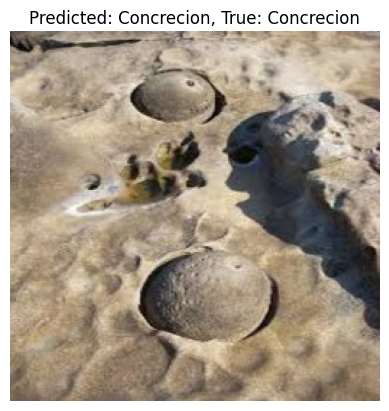

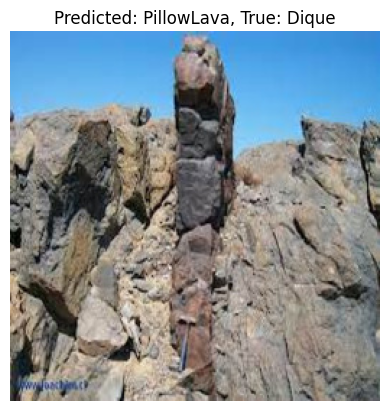

In [20]:
# Mostrar algumas imagens de teste com suas classes preditas e reais
num_images = 15  # Número de imagens para mostrar
sample_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)
for idx in sample_indices:
    image_path = os.path.join(diretorio_teste, test_generator.filenames[idx])
    image = Image.open(image_path)
    predicted_class = class_labels[predicted_classes[idx]]
    true_class = class_labels[true_classes[idx]]
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_class}, True: {true_class}')
    plt.axis('off')
    plt.show()